In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## EDA

:)

"SBP" typically stands for "systolic blood pressure," which is the highest pressure reached in the arteries during each heartbeat.

"DBP" typically stands for "diastolic blood pressure," which is the lowest pressure reached in the arteries between heartbeats.

"STAI": State-Trait Anxiety Inventory score

"PM2.5": concentration of fine particulate matter (particles with diameter of 2.5 micrometers or less) in the air

In [2]:
%ls

Habitat Stress Mattia.ipynb  Restorative_Cate.csv
Habitat_Stress.csv           Restorative_Conti.csv


In [3]:
df = pd.read_csv('Restorative_Cate.csv')
df.head()

,ID,Setting,Post,SBP,DBP,STAI,PM2.5,Temp,Rh,CO2,...,Stresslevel,Stress_or_not_after_test,Which_part_first,Which_part_stress_most,VR_experience,Experience_Nature,Scence_1,Scence_2,Scence_3,Scence_4
0,1,1,0,118,76,,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
1,1,1,1,115,74,,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
2,1,1,2,115,76,2.833,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
3,1,1,3,113,76,2.833,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
4,2,2,0,101,66,,0.0,21.7,37.0,640,...,1,No,2,1,More than 10 times,3,3.0,4.0,1.0,2.0


In [4]:
#Stresslevel takes values from 1 to 4. I though that 1,2 values of "stresslevel" indicated 
#Stress_or_not_after_test == "No", while for 3,4 Stress_or_not_after_test == "Yes"
print("yes:", (df[df["Stresslevel"]>=3]["Stress_or_not_after_test"]=="Yes").sum())
print("no:", (df[df["Stresslevel"]>=3]["Stress_or_not_after_test"]=="No").sum())
#apparently this is not the case, weird but let's forget about Stress_or_not_after_test and focus only on Stresslevel

yes: 100
no: 44


In [5]:
df.columns[16:].values

array(['Caffinebeverage', 'Stresslevel', 'Stress_or_not_after_test',
       'Which_part_first', 'Which_part_stress_most', 'VR_experience',
       'Experience_Nature', 'Scence_1', 'Scence_2', 'Scence_3',
       'Scence_4'], dtype=object)

In [6]:
df = df.drop(columns=["Setting", "Post", "STAI"])
print(df.columns[15:].values)
df = df.drop(columns= df.columns[15:].values)
df.head()

['Stress_or_not_after_test' 'Which_part_first' 'Which_part_stress_most'
 'VR_experience' 'Experience_Nature' 'Scence_1' 'Scence_2' 'Scence_3'
 'Scence_4']


,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Sex,ethnic,Healthcondition,Medicine,Sleep,Caffinebeverage,Stresslevel
0,1,118,76,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
1,1,115,74,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
2,1,115,76,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
3,1,113,76,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
4,2,101,66,0.0,21.7,37.0,640,30,Female,Multiracial,Excellent,No,Yes,No,1


In [7]:
df.describe()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Stresslevel
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,50.50000,115.692500,75.995000,0.324000,21.344000,36.742000,715.970000,29.190000,2.200000
std,28.90222,12.378247,10.838064,0.551893,1.150641,9.943753,120.597963,11.794986,0.917663
min,1.00000,83.000000,51.000000,0.000000,18.800000,20.000000,283.000000,18.000000,1.000000
25%,25.75000,107.750000,70.000000,0.000000,20.475000,29.100000,634.500000,21.000000,1.750000
50%,50.50000,114.000000,75.000000,0.000000,21.400000,37.000000,700.500000,26.000000,2.000000
75%,75.25000,122.000000,81.000000,0.200000,22.100000,41.925000,789.000000,33.250000,3.000000
max,100.00000,175.000000,123.000000,3.000000,23.600000,60.600000,1117.000000,73.000000,4.000000


In [8]:
#make stress level range [0,3] instead of [1,4]. This is done to match the stress sleep dataset
df["Stresslevel"]-=1

### Mapping non numerical variables

sex

In [9]:
df["Sex"].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df["Sex"] = df["Sex"].map({'Male': 1, 'Female': 0})

In [11]:
df["Sex"].unique()

array([1, 0])

ethnic

In [12]:
df["ethnic"].value_counts()

White/Caucasian              164
Asian                         96
Black or African American     68
Multiracial                   44
Latino                        24
No response                    4
Name: ethnic, dtype: int64

In [13]:
df = pd.get_dummies(df, columns=['ethnic'])
df.head()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Sex,Healthcondition,Medicine,Sleep,Caffinebeverage,Stresslevel,ethnic_Asian,ethnic_Black or African American,ethnic_Latino,ethnic_Multiracial,ethnic_No response,ethnic_White/Caucasian
0,1,118,76,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
1,1,115,74,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
2,1,115,76,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
3,1,113,76,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
4,2,101,66,0.0,21.7,37.0,640,30,0,Excellent,No,Yes,No,0,0,0,0,1,0,0


Healthcondition

In [14]:
#won't create dummy variables, instead assign increasing numbers coz we are interested in the order
df["Healthcondition"].unique()

array(['Very good', 'Excellent', 'Good', 'Fair'], dtype=object)

In [15]:
#we need to map strings to numbers
df["Healthcondition"] = df["Healthcondition"].map({'Excellent': 3, 'Very good': 2, 'Good': 1, 'Fair': 0})

In [16]:
df["Healthcondition"].unique()

array([2, 3, 1, 0])

medicine

In [17]:
df["Medicine"].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df["Medicine"] = df["Medicine"].map({'Yes': 1, 'No': 0})

In [19]:
df["Medicine"].unique()

array([0, 1])

sleep

In [20]:
df["Sleep"] = df["Sleep"].map({'Yes': 1, 'No': 0})

caffeine beverage

In [21]:
df["Caffinebeverage"] = df["Caffinebeverage"].map({'Yes': 1, 'No': 0})

In [22]:
df.head()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Sex,Healthcondition,Medicine,Sleep,Caffinebeverage,Stresslevel,ethnic_Asian,ethnic_Black or African American,ethnic_Latino,ethnic_Multiracial,ethnic_No response,ethnic_White/Caucasian
0,1,118,76,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
1,1,115,74,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
2,1,115,76,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
3,1,113,76,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
4,2,101,66,0.0,21.7,37.0,640,30,0,3,0,1,0,0,0,0,0,1,0,0


Check for missing values in the dataset


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                400 non-null    int64  
 1   SBP                               400 non-null    int64  
 2   DBP                               400 non-null    int64  
 3   PM2.5                             400 non-null    float64
 4   Temp                              400 non-null    float64
 5   Rh                                400 non-null    float64
 6   CO2                               400 non-null    int64  
 7   Age                               400 non-null    int64  
 8   Sex                               400 non-null    int64  
 9   Healthcondition                   400 non-null    int64  
 10  Medicine                          400 non-null    int64  
 11  Sleep                             400 non-null    int64  
 12  Caffineb

In [24]:
df.isna().sum()

ID                                  0
SBP                                 0
DBP                                 0
PM2.5                               0
Temp                                0
Rh                                  0
CO2                                 0
Age                                 0
Sex                                 0
Healthcondition                     0
Medicine                            0
Sleep                               0
Caffinebeverage                     0
Stresslevel                         0
ethnic_Asian                        0
ethnic_Black or African American    0
ethnic_Latino                       0
ethnic_Multiracial                  0
ethnic_No response                  0
ethnic_White/Caucasian              0
dtype: int64

In [25]:
df_num = df.iloc[:, list(range(8)) + [13]]
df_num.head()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Stresslevel
0,1,118,76,0.0,19.5,39.8,658,26,1
1,1,115,74,0.0,19.5,39.8,658,26,1
2,1,115,76,0.0,19.5,39.8,658,26,1
3,1,113,76,0.0,19.5,39.8,658,26,1
4,2,101,66,0.0,21.7,37.0,640,30,0


Visualize the distribution of the variables using histograms or density plots.

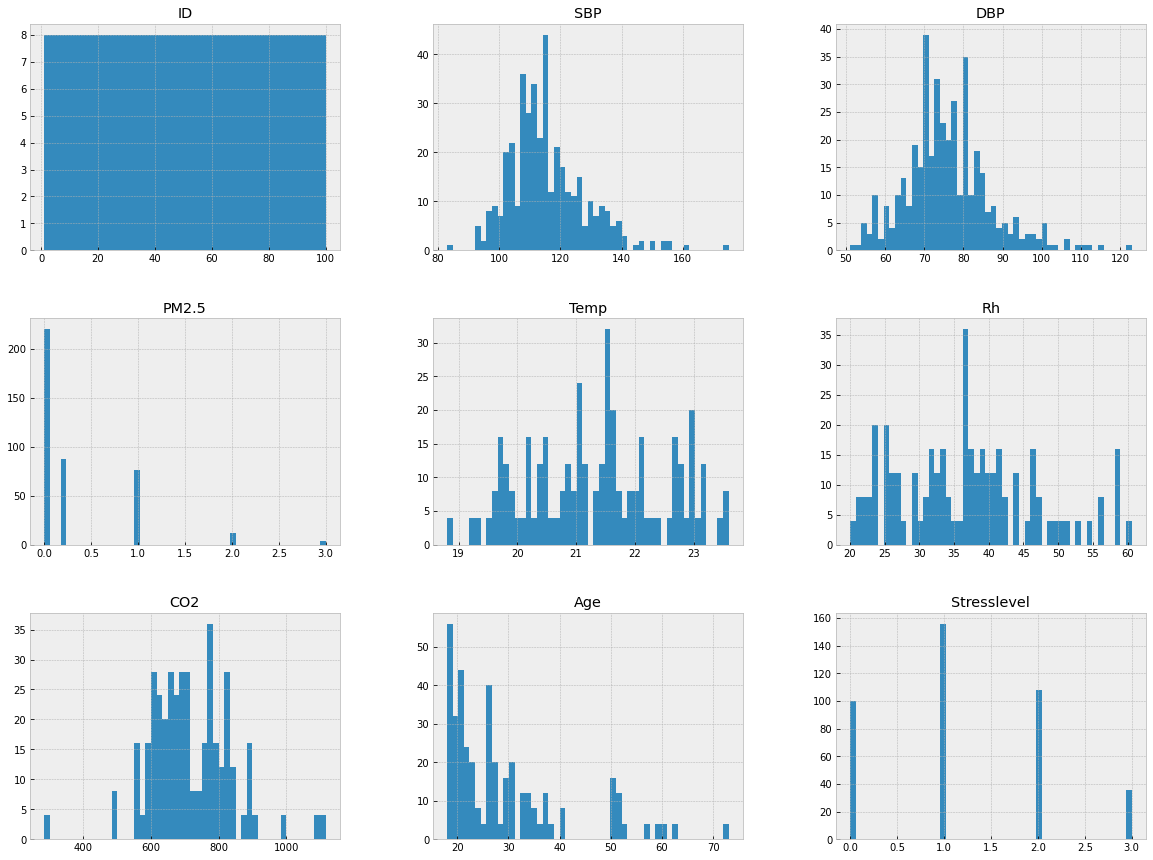

In [26]:
df_num.hist(bins=50, figsize=(20, 15))

plt.show()

Visualize the relationship between the continuous variables and the categorical target variable using boxplots or violin plots

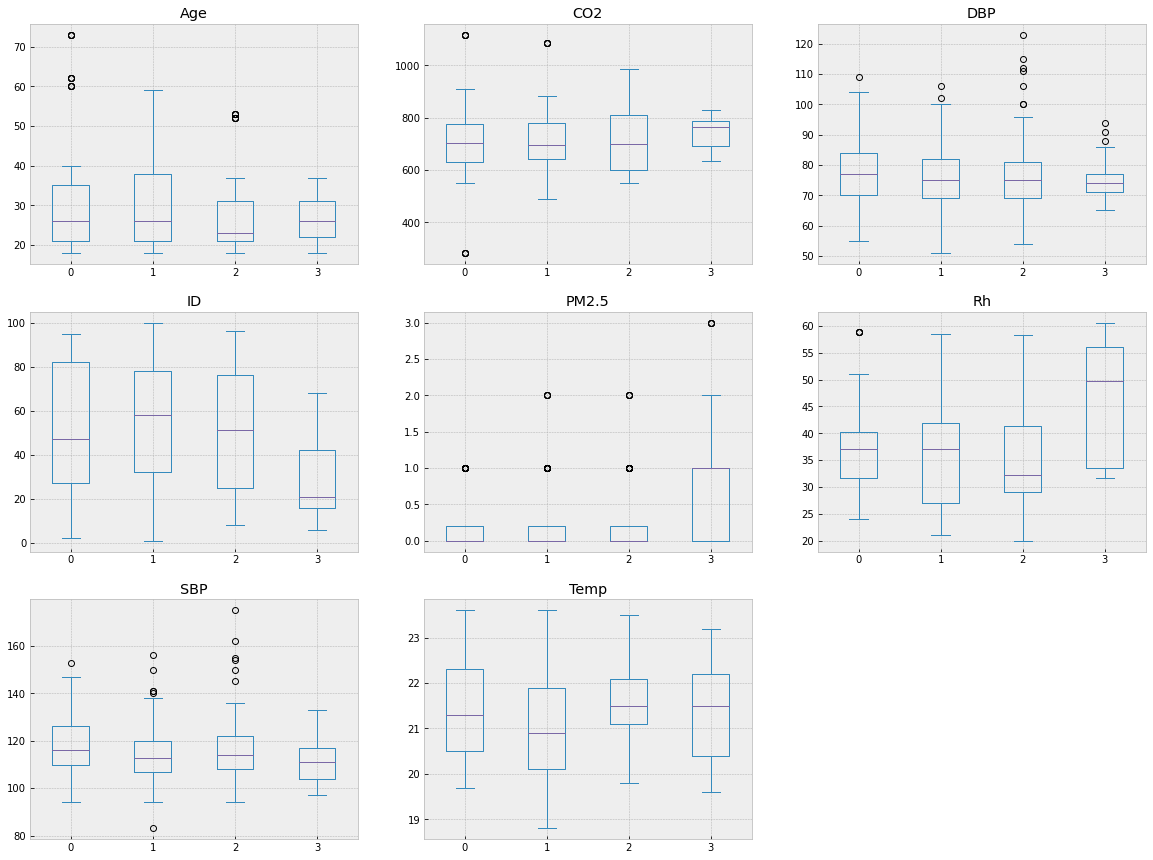

In [27]:
# create boxplots for each continuous variable by target variable
df_num.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(20, 15), by='Stresslevel')
plt.show()

Check for any correlations between the continuous variables using a correlation matrix heatmap.

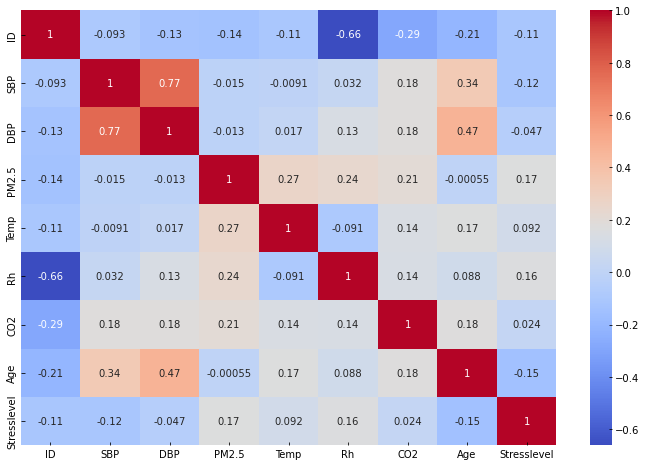

In [28]:
corr_matrix = df_num.corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

No significant correlations

## Model Building

training and testing (scale features)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, [n for n in range(20) if n != 13]] #take all variables a part from target (stress) that is at index 13

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forest (best model)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

Accuracy of random forest: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        11

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



#### save the model

In [35]:
import joblib

filename = 'habitat_random_forest_model.joblib'
joblib.dump(rf, filename)

['habitat_random_forest_model.joblib']

#### load the model

In [36]:
# load the saved model
loaded_model = joblib.load(filename)

# use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

### Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of logistic regression:", accuracy_lr)

report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)

Accuracy of logistic regression: 0.61
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        22
           1       0.58      0.73      0.65        41
           2       0.65      0.50      0.57        26
           3       1.00      0.55      0.71        11

    accuracy                           0.61       100
   macro avg       0.69      0.58      0.62       100
weighted avg       0.64      0.61      0.61       100



### Deep Learning

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values, dtype=torch.long)

# create a PyTorch dataset and dataloader for the training data
train_dataset = TensorDataset(X_tensor, y_tensor)
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(19, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# create an instance of the neural network
net = Net()

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

# train the neural network
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

Epoch 1 loss: 1.365
Epoch 2 loss: 1.356
Epoch 3 loss: 1.348
Epoch 4 loss: 1.341
Epoch 5 loss: 1.336
Epoch 6 loss: 1.328
Epoch 7 loss: 1.322
Epoch 8 loss: 1.316
Epoch 9 loss: 1.309
Epoch 10 loss: 1.301
Epoch 11 loss: 1.295
Epoch 12 loss: 1.282
Epoch 13 loss: 1.272
Epoch 14 loss: 1.268
Epoch 15 loss: 1.256
Epoch 16 loss: 1.254
Epoch 17 loss: 1.239
Epoch 18 loss: 1.237
Epoch 19 loss: 1.225
Epoch 20 loss: 1.221
Epoch 21 loss: 1.213
Epoch 22 loss: 1.200
Epoch 23 loss: 1.200
Epoch 24 loss: 1.192
Epoch 25 loss: 1.186
Epoch 26 loss: 1.188
Epoch 27 loss: 1.176
Epoch 28 loss: 1.171
Epoch 29 loss: 1.165
Epoch 30 loss: 1.159
Epoch 31 loss: 1.154
Epoch 32 loss: 1.142
Epoch 33 loss: 1.133
Epoch 34 loss: 1.133
Epoch 35 loss: 1.123
Epoch 36 loss: 1.120
Epoch 37 loss: 1.106
Epoch 38 loss: 1.100
Epoch 39 loss: 1.098
Epoch 40 loss: 1.083
Epoch 41 loss: 1.084
Epoch 42 loss: 1.085
Epoch 43 loss: 1.065
Epoch 44 loss: 1.055
Epoch 45 loss: 1.055
Epoch 46 loss: 1.045
Epoch 47 loss: 1.032
Epoch 48 loss: 1.033
E

In [34]:
from sklearn.metrics import classification_report

# convert NumPy arrays to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# make predictions on the test data
net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)
y_pred = y_pred_tensor.argmax(dim=1).numpy()

# generate a classification report
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.55      0.60        22
     class 1       0.69      0.88      0.77        41
     class 2       0.83      0.58      0.68        26
     class 3       0.75      0.82      0.78        11

    accuracy                           0.72       100
   macro avg       0.74      0.70      0.71       100
weighted avg       0.73      0.72      0.71       100

